# Assignment 1

1. Compare word frequencies between two works of a single author.
1. Compare word frequencies between works of two authors.
1. Are there some words preferred by one author but used less frequently by another author?

Extra credit

1. The frequency of a specific word, e.g., "would" should follow a binomial distribution (each regular word in a document is a trial and with probability p that word is "would". The estimate for p is N("would")/N(regular word)). Do these binomial distributions for your chosen word differ significantly between books of the same author or between authors? 

Project Gutenberg is a good source of for fiction and non-fiction.

E.g below are two most popular books from Project Gutenberg:
- Pride and Prejudice at http://www.gutenberg.org/ebooks/1342.txt.utf-8
- Adventures of Huckleberry Finn at http://www.gutenberg.org/ebooks/76.txt.utf-8

In [1]:
import requests, re, nltk, time
from bs4 import BeautifulSoup
from nltk import clean_html
from collections import Counter
import operator

# we may not care about the usage of stop words
stop_words = nltk.corpus.stopwords.words('english') + [
 'ut', '\'re','.', ',', '--', '\'s', '?', ')', '(', ':', '\'',
 '\"', '-', '}', '{', '&', '|', u'\u2014'] + ['project','gutenberg','','â','“you','“i',
 'â\x80\x9ci','â\x80\x9ci','donâ\x80\x99t','â\x80\x9cand','gutenberg-tm','im']

# We most likely would like to remove html markup
def cleanHtml (html):
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')
    return soup .get_text()

# We also want to remove special characters, quotes, etc. from each word
def cleanWord (w):
    # r in r'[.,"\']' tells to treat \ as a regular character 
    # but we need to escape ' with \'
    # any character between the brackets [] is to be removed 
    wn = re.sub('[,"\.\'&\|:@>*;/=]', "", w)
    # get rid of numbers
    return re.sub('^[0-9\.]*$', "", wn)
       
# define a function to get text/clean/calculate frequency
def get_wf (URL):
    # first get the web page
    r = requests .get(URL)
    
    # Now clean
    # remove html markup
    t = cleanHtml (r .text) .lower()
    
    # split string into an array of words using any sequence of spaces "\s+" 
    wds = re .split('\s+',t)
    
    # remove periods, commas, etc stuck to the edges of words
    for i in range(len(wds)):
        wds [i] = cleanWord (wds [i])
    
    # If satisfied with results, lets go to the next step: calculate frequencies
    # We can write a loop to create a dictionary, but 
    # there is a special function for everything in python
    # in particular for counting frequencies (like function table() in R)
    wf = Counter (wds)
    
    # Remove stop words from the dictionary wf
    for k in stop_words:
        wf. pop(k, None)
        
    #how many regular words in the document?
    tw = 0
    for w in wf:
       tw += wf[w] 
        
    
    # Get ordered list
    wfs = sorted (wf .items(), key = operator.itemgetter(1), reverse=True)
    ml = min(len(wfs),15)
    
    wfs_orig = wfs
    
    #Reverse the list because barh plots items from the bottom
    return (wfs [ 0:ml ] [::-1], tw)
        

In [2]:
#Plot the results: are there striking differences in language?
import numpy as np
import pylab
import matplotlib.pyplot as plt

%matplotlib inline
def plotTwoLists (wf_ee, wf_bu, title):
    f = plt.figure (figsize=(10, 6))
    # this is painfully tedious....
    f .suptitle (title, fontsize=20)
    ax = f.add_subplot(111)
    ax .spines ['top'] .set_color ('none')
    ax .spines ['bottom'] .set_color ('none')
    ax .spines ['left'] .set_color ('none')
    ax .spines ['right'] .set_color ('none')
    ax .tick_params (labelcolor='w', top='off', bottom='off', left='off', right='off', labelsize=20)

    # Create two subplots, this is the first one
    ax1 = f .add_subplot (121)
    plt .subplots_adjust (wspace=.5)

    pos = np .arange (len(wf_ee)) 
    ax1 .tick_params (axis='both', which='major', labelsize=14)
    pylab .yticks (pos, [ x [0] for x in wf_ee ])
    ax1 .barh (range(len(wf_ee)), [ x [1] for x in wf_ee ], align='center')

    ax2 = f .add_subplot (122)
    ax2 .tick_params (axis='both', which='major', labelsize=14)
    pos = np .arange (len(wf_bu)) 
    pylab .yticks (pos, [ x [0] for x in wf_bu ])
    ax2 .barh (range (len(wf_bu)), [ x [1] for x in wf_bu ], align='center')



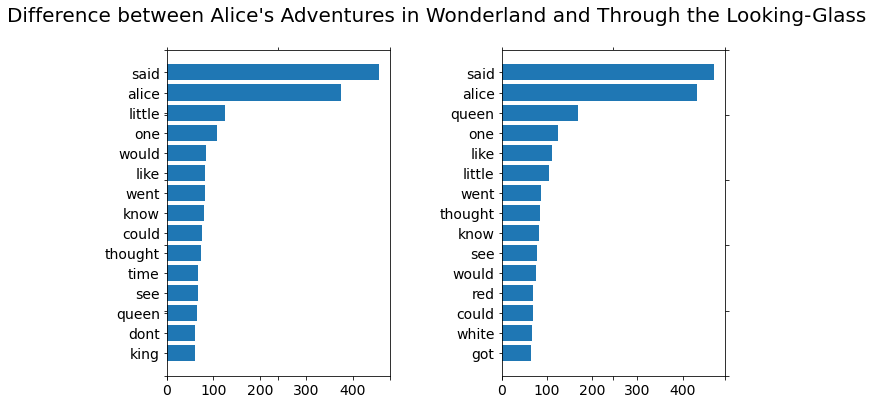

In [3]:
(wf_ee, tw_ee) = get_wf('https://www.gutenberg.org/files/928/928-h/928-h.htm')
(wf_bu, tw_bu) = get_wf('https://www.gutenberg.org/files/12/12-0.txt')

plotTwoLists (wf_ee, wf_bu, "Difference between Alice's Adventures in Wonderland and Through the Looking-Glass")


In [4]:
# Reverse list for easy of use
wf_ee = wf_ee[::-1]
wf_bu = wf_bu[::-1]

# Loop through to print top 15 names for each novel
print("Alice's Adventures in Wonderland 15 most common words in order:")
i = 0
while i < len(wf_ee)-1:
    print(str(wf_ee[i][0]) + ", ", end='')
    i = i + 1
    if i == len(wf_ee) - 1:
        print(str(wf_ee[i][0]), end='\n\n') 
        
print('Through the Looking-Glass 15 most common words in order:')
j = 0
while j < len(wf_bu)-1:
    print(str(wf_bu[j][0]) + ", ", end='')
    j = j + 1
    if j == len(wf_bu) - 1:
        print(str(wf_bu[j][0]), end='\n\n') 

# Loop through and find which words are shared between novels and print them
print('Shared words, # of times written, and order in list:')
i = 0
j = 0
numShared = 0
while i < len(wf_bu):
    if wf_ee[i][0] == wf_bu[j][0]:
        print('""' + str(wf_ee[i][0]) + '""\n    AAW: ' + str(wf_ee[i][1]) + '\tRank: ' +str(i+1) )
        print('    TLG: ' + str(wf_bu[j][1]) + '\tRank: ' +str(j+1) )
        numShared = numShared + 1
    j = j+1
    if j >= len(wf_bu):
        i = i+1
        j = 0
print('\nThe number of shared words written: ' + str(numShared) + '/' + str(len(wf_ee)))
wf_ee = wf_ee[::-1]
wf_bu = wf_bu[::-1]

Alice's Adventures in Wonderland 15 most common words in order:
said, alice, little, one, would, like, went, know, could, thought, time, see, queen, dont, king

Through the Looking-Glass 15 most common words in order:
said, alice, queen, one, like, little, went, thought, know, see, would, red, could, white, got

Shared words, # of times written, and order in list:
""said""
    AAW: 457	Rank: 1
    TLG: 470	Rank: 1
""alice""
    AAW: 375	Rank: 2
    TLG: 432	Rank: 2
""little""
    AAW: 125	Rank: 3
    TLG: 104	Rank: 6
""one""
    AAW: 108	Rank: 4
    TLG: 125	Rank: 4
""would""
    AAW: 84	Rank: 5
    TLG: 75	Rank: 11
""like""
    AAW: 83	Rank: 6
    TLG: 112	Rank: 5
""went""
    AAW: 83	Rank: 7
    TLG: 88	Rank: 7
""know""
    AAW: 79	Rank: 8
    TLG: 82	Rank: 9
""could""
    AAW: 76	Rank: 9
    TLG: 70	Rank: 13
""thought""
    AAW: 73	Rank: 10
    TLG: 85	Rank: 8
""see""
    AAW: 66	Rank: 12
    TLG: 79	Rank: 10
""queen""
    AAW: 65	Rank: 13
    TLG: 169	Rank: 3

The number of shared 

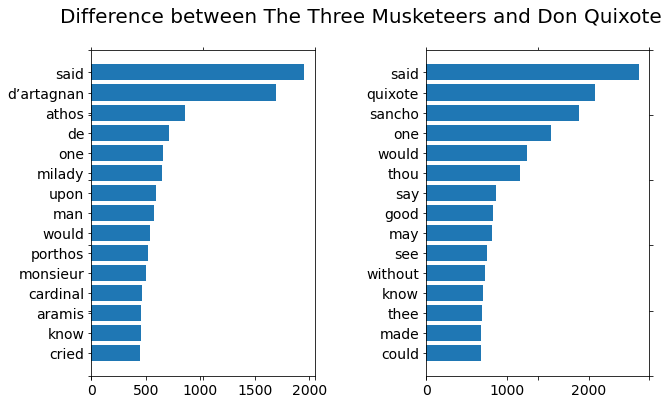

In [5]:
(wf_ee, tw_ee) = get_wf('https://www.gutenberg.org/cache/epub/1257/pg1257.txt')
(wf_bu, tw_ee) = get_wf('https://www.gutenberg.org/cache/epub/996/pg996.txt')

plotTwoLists (wf_ee, wf_bu, 'Difference between The Three Musketeers and Don Quixote')

In [6]:
# Reverse list for easy of use
wf_ee = wf_ee[::-1]
wf_bu = wf_bu[::-1]

# Loop through to print top 15 names for each novel
print('The Three Musketeers 15 most common words in order:')
i = 0
while i < len(wf_ee)-1:
    print(str(wf_ee[i][0]) + ", ",end='')
    i = i + 1
    if i == len(wf_ee) - 1:
        print(str(wf_ee[i][0]), end='\n\n') 

print('Don Quixote 15 most common words in order:')
j = 0
while j < len(wf_bu)-1:
    print(str(wf_bu[j][0]) + ", ",end='')
    j = j + 1
    if j == len(wf_bu) - 1:
        print(str(wf_bu[j][0]), end='\n\n') 

# Loop through and find which words are shared between novels and print them
print('Shared words, # of times written, and order in list:')
i = 0
j = 0
numShared = 0
while i < len(wf_bu):
    if wf_ee[i][0] == wf_bu[j][0]:
        print('"' + str(wf_ee[i][0]) + '"\n    TTM: ' + str(wf_ee[i][1]) + '\tRank: ' +str(i+1) )
        print("     DQ: " + str(wf_bu[j][1]) + '\tRank: ' +str(j+1) )
        numShared = numShared + 1
    j = j+1
    if j >= len(wf_bu):
        i = i+1
        j = 0
        
print('\nThe number of shared words written: ' + str(numShared) + '/' + str(len(wf_ee)))
wf_ee = wf_ee[::-1]
wf_bu = wf_bu[::-1]

The Three Musketeers 15 most common words in order:
said, d’artagnan, athos, de, one, milady, upon, man, would, porthos, monsieur, cardinal, aramis, know, cried

Don Quixote 15 most common words in order:
said, quixote, sancho, one, would, thou, say, good, may, see, without, know, thee, made, could

Shared words, # of times written, and order in list:
"said"
    TTM: 1949	Rank: 1
     DQ: 2615	Rank: 1
"one"
    TTM: 653	Rank: 5
     DQ: 1538	Rank: 4
"would"
    TTM: 539	Rank: 9
     DQ: 1240	Rank: 5
"know"
    TTM: 451	Rank: 14
     DQ: 694	Rank: 12

The number of shared words written: 4/15
